# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data from a python pickle 


For every image there exists a corresponding answer, what kind of traffic sign this image represent. Udacity provided us with a preselected train, test and validation dataset so we do not have to think about, how to split the original dataset into meaningful subsets to each task. 

Statistically seen all of our data present is the population and we are taking samples of the population to estimate the correlation between features and classes. The problem is that the sample does not have to reflect the statistical correlations of features and classes as it is in the population. Learned patterns that fit the traing set well may not be as strong when applied to the population. Thats why we need an independet test set to estimate the accuracy of the trained model on the whole population. 
When the patterns learned by the NN only work well on the training data it will not perform good on the popluation. This effect is called overfitting and is always a danger and have to be observed, when a NN is built and trained. We want that our calssifier generalizes good so that it apply to the population well. 

Training Dataset 
All images (features) used to train (FIT) parameters of the NN. The neurons are going to "learn" on this dataset, which image represents which class of the 43 traffic sign classes (target vector). At the end of each epoch, the result of the NN is going to be compared with the target vector using a cost function to determine the "correctness" of the NN guess. Then the weights and biases are adjusted using backpropagation in order to minimize the error between the NN guess and the target vector -> the correct answer -> using methods like gradient descend. 

Validation Dataset 
The validation set is a set of features and a target vector, which is used to prevent the network to overfit on the training data set. It is used to measure the actual error. The validation set can also "bleed" into the weights of the network, so it may overfit on the validation set too. That why we need a test data set.     

Test Dataset 
This is an unbiased set of features and target vector used to evaluate the final model fit. It should be kept under disclosure till the model is fully trained and have to be independent from booth TRAINING and VALIDATION set. It is used to assess the performance of the network in terms of generalization and predictive power. 



Loading original data
[16  1 38 ...,  6  7 10]
Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Type = <class 'numpy.ndarray'>
Shape = (34799, 32, 32, 3)
Size = 106902528
MinValue 0
MaxValue 255
MeanValue 82.677589037
(32, 32, 3)


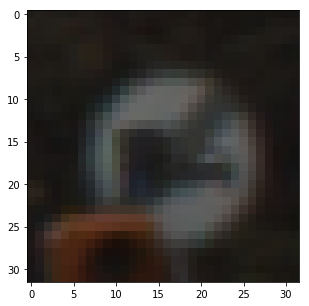

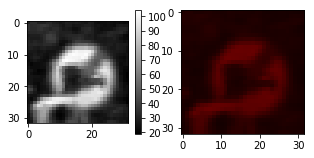

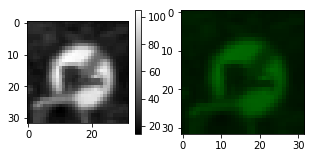

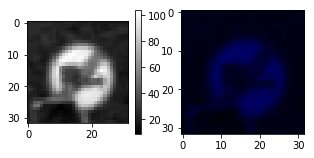

In [1]:
# Load pickled data
import pickle
import pprint 


# Loading data 

# Choose if data is already precalculated 
use_normalized = False 

if use_normalized:
    print("Loading normalized data")
    training_file = 'train_normalized.p'   # Training Set 
    testing_file= 'test_normalized.p'      # Test Set 
    validation_file = 'valid_normalized.p'
else:
    print("Loading original data")
    training_file = 'train.p'   # Training Set 
    testing_file= 'test.p'      # Test Set 
    validation_file = 'valid.p'

    
    
# Open and load the data 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#pp = pprint.PrettyPrinter()    
#pp.pprint(train)
    
# We have a list of features (images, 32x32x3 RGB) and a list of labels, where the Index of 
# a feature corresponds to the index of the label. Thus, the label list holds the type of 
# feature classification for eatch feature in the feature list. 
    
# Getting training data -> this data is used to train the CNN     
X_train = train['features'] 
y_train = train['labels']

# Getting validation data -> This data is used to validate 
X_validation = valid['features']
y_validation = valid['labels']

# Getting test set data 
X_test = test['features']
y_test = test['labels']


### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
print(y_test) # --> Labels of Classified test images --> One label more than once in the list 
# --> Need to get unique labels 
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html

n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


##from sklearn.model_selection import train_test_split 
##X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
##print("Validation Set: {} samples".format(len(X_validation)))

#from sklearn.preprocessing import scale
#X = scale( X, axis=0, with_mean=True, with_std=True, copy=True )


### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

print("Type =", type(X_train))
print("Shape =",X_train.shape)  # 4D Image set ... Number of images 
print("Size =",X_train.size) 
print("MinValue", X_train.min())
print("MaxValue", X_train.max())
print("MeanValue", X_train.mean())

# Randomply pic an entry 
index = random.randint(0, len(X_train))
#index = 100 
print (X_train[index].shape)  # --> List of features ... first index is the list index 

# Fooling around with the numpy structure to get the grip of it 
# Get the value of the pixel on the 10th row and 20th column
#X_train[index, 0, 31, 0] = 0
# Set to black the ten first lines
#X_train[index,:10, 0] = 0


# squeeze() - Remove single-dimensional entries from the shape of an array.
image = X_train[index].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(image)

columns = 2
size_factor = 5

# Using Subplot on an array of images 
# https://stackoverflow.com/a/45280846
# image = array of images 

#plt.figure(figsize=(20,10))
#columns = 5
#for i, image in enumerate(images):
#    plt.subplot(len(images) / columns + 1, columns, i + 1)
#    plt.imshow(image)

# ---------- RED CHANNEL 
plt.figure(figsize=(size_factor,size_factor))
# This only extracts one channel --> intensities of red channel --> so I can only display a gray image  
red_channel = X_train[index,:,:,0].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(red_channel, cmap=plt.cm.gray) # , cmap="hot"
plt.colorbar()

# Assuming I is numpy array with 3 channels in RGB order
I_red = X_train[index].copy()  # Duplicate image   ---> In order to make a deep copy of image I need to .copy()
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_red)

# ---------- Green CHANNEL
plt.figure(figsize=(size_factor,size_factor))

green_channel = X_train[index,:,:,1].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(green_channel, cmap=plt.cm.gray)
plt.colorbar()


# Assuming I is numpy array with 3 channels in RGB order
I_green = X_train[index].copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from green
I_green[:, :, 2] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_green)

# ---------- Blue CHANNEL
plt.figure(figsize=(size_factor,size_factor))

blue_channel = X_train[index,:,:,2].squeeze() 

plt.subplot(2 / columns + 1, columns, 0 + 1)
plt.imshow(blue_channel, cmap=plt.cm.gray)
plt.colorbar()


# Assuming I is numpy array with 3 channels in RGB order
I_blue = X_train[index].copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from green
I_blue[:, :, 1] = 0    # Zero out contribution from blue

plt.subplot(2 / columns + 1, columns, 1 + 1)
plt.imshow(I_blue)

# Lets plot

Maybe it would be interesting to know, how many samples of a traffic sign class is present in the training data. This could show us, if some of the traffic signs are underrepresented in the training set which may lead to biased classification results thowards the strong classes. 

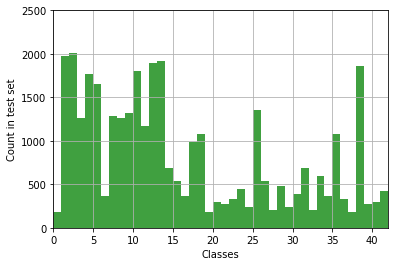

In [2]:
# Generate a Histogram with 43 bins 
# Run through y_train and add 1 to bin if bin == label_class 

# the histogram of the data
n, bins, patches = plt.hist(y_train, 42, normed=0, facecolor='green', alpha=0.75)

plt.xlabel('Classes')
plt.ylabel('Count in test set')
plt.axis([0, 42, 0, 2500])
plt.grid(True)

plt.show()

# What I have learned about my data

- My data comes as serialized python pickle data files 
- The files contain  
    - Training examples = 34799
    - Testing examples = 12630
    - Number of classes = 43 
- Images have following properties
    - Shape 32 x 32 x 3 
    - 3 Channels 
    - Color Format R G B 

- The data is organized as a 4D structure [feature_index,height,width,channels] 


List of features

[0] = [32,32,3] image

[1] = [32,32,3] image

[2] = [32,32,3] image

[3] = [32,32,3] image

 ...
 
[n] = [32,32,3] image


## Data augmentation 

- <b>The histogram of images per present classes show that some classes have more samples than other classes, which can lead to biased training results thorwards thestrong classs</b>  
- The database is not very large 
- It would be advisable to generate some agumented data to balance the image classes 
- Also mentioned in Lecture 11 of CS231 as very widely used approach to enhance the database 
- Large datasets are preprocessed image by image in the pipeline, we can preprocess our small dataset in advance because it does not use that much disk/memory space 

https://youtu.be/pA4BsUK3oP4?t=321


#### Sidenote: What is a python pickle? 
A pickle is used for serializing and de-serializing a Python object structure. In our case it serializes our image data and calssification list into a stream of characters. This character stream contains everything to reconstruct the objects in another python scripts, including the structures used (list, dict, etc.)


# Preprocessing of the data 

http://cs231n.github.io/neural-networks-2/

"In images is not as common to normalize data, because you dont have seperate different features that can at different units  everything is just pixels and they are bounded between 0 255 so it not as common to normalize the data, but its common to zero center your data" - Andrej Karpathy 
https://youtu.be/gYpoJMlgyXA?t=2066

Center Image Data: 

"In images specifically whats common is just a mean centering and then a particular variant of mean centering that is slightly more convinient in practice. ..... If you want to center your data then for every single pixel you comput its mean value over the TRAINING SET and you substract that out - so what you end up is this mean image with dimensions of 32x32x3 ... so you end up substracting that from every single image to center your data to have better training dynamics. And one other form that is slightly more convinient is substracting a per channel mean. So you go in red green blue channel and compute to the mean across all of space. so you just end up with basically three numbers of the means of the red green and blue channels ... This one is more convinient because you only have to care about those three numbers you dont have to worry about a giant array of mean image that you have to ship arround everywhere when you coding this up. ... <b>Just basically substract the mean in CV applications things dont get much more complex than that </b>" - Andrej Karpathy 
https://youtu.be/gYpoJMlgyXA?t=2120

Whitening / PCA on images: 

"The issue is you cant apply it on full images because your images are very high dimensional objects with lots of pixels - and so this covariance matrices will be huge. And people tried to do things like applying whitening only localy so you slide a whitening filter through your images spatially and that used to be done several years ago - but is not as common now - it doesnt seem to matter too much" - Andrej Karpaty 
https://youtu.be/gYpoJMlgyXA?t=2184

Following the proposal of <b>Lesson 6: Introduction to TensorFlow 23.Normalized Inputs and Initial Weights</b> I am going to Substract 128 From each pixel value in each channel and divide it by 128. This is going to center the image data around 0 in an interval of [-1 and 1]. 

(255-128)/128 = 1 
(0-128) / 1228 = -1 
(128-128) / 128 = 0 





-------------- udacity per channel calculation -------------------


Image statistic all three channels
mean  43.8818359375
std  24.5435154213


Image statistic Channel R
mean  47.5390625
std  23.728905877


Image statistic Channel R - after op
mean  -6.93889390391e-18
std  1.0


Image statistic Channel G
mean  42.814453125
std  24.2588729356


Image statistic Channel G - after op
mean  -2.77555756156e-17
std  1.0


Image statistic Channel B
mean  41.2919921875
std  25.1868349466


Image statistic Channel B - after op
mean  -1.38777878078e-17
std  1.0


Image statistic all three channels after each channel handled seperately - UDACITY PROPOSAL
mean  -1.85037170771e-17
std  1.0
--------------- All channels at once ------------------

Udacity proposal after op on three channels: 
mean  -0.657173156738
std  0.191746214229
--------------cs231 Per Channel calculation -------------------


Image statistic all three channels
mean  43.8818359375
std  24.5435154213


Image statistic Channel R
m

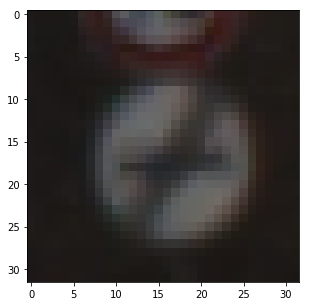

In [3]:
import math
import matplotlib.mlab as mlab

# As proposed by udacity course 
# Changing interval to -1 - 1 
#image_prepro_udacity = X_train[0,0:2,0:2].copy().astype(float)

print("-------------- udacity per channel calculation -------------------")

index = 0
plt.figure(figsize=(size_factor,size_factor))
plt.imshow(X_train[index])
image_prepro_udacity_channel_wise = X_train[index].copy().astype(float)
image_prepro_udacity_one_step = X_train[index].copy().astype(float)


mean = np.mean(image_prepro_udacity_channel_wise)
standard_dev = np.std(image_prepro_udacity_channel_wise)
print("\n\nImage statistic all three channels")
print("mean ", mean)
print("std ", standard_dev)

################# R 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,0])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,0])

print("\n\nImage statistic Channel R")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,0] = image_prepro_udacity_channel_wise[:,:,0] - mean
image_prepro_udacity_channel_wise[:,:,0] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,0])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,0])

print("\n\nImage statistic Channel R - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,1])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,1])

print("\n\nImage statistic Channel G")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,1] = image_prepro_udacity_channel_wise[:,:,1] - mean
image_prepro_udacity_channel_wise[:,:,1] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,1])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,1])

print("\n\nImage statistic Channel G - after op")
print("mean ", mean)
print("std ", standard_dev)

################# B

mean = np.mean(image_prepro_udacity_channel_wise[:,:,2])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,2])

print("\n\nImage statistic Channel B")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_udacity_channel_wise[:,:,2] = image_prepro_udacity_channel_wise[:,:,2] - mean
image_prepro_udacity_channel_wise[:,:,2] /= standard_dev 

mean = np.mean(image_prepro_udacity_channel_wise[:,:,2])
standard_dev = np.std(image_prepro_udacity_channel_wise[:,:,2])

print("\n\nImage statistic Channel B - after op")
print("mean ", mean)
print("std ", standard_dev)

mean = np.mean(image_prepro_udacity_channel_wise)
standard_dev = np.std(image_prepro_udacity_channel_wise)
print("\n\nImage statistic all three channels after each channel handled seperately - UDACITY PROPOSAL")
print("mean ", mean)
print("std ", standard_dev)

print("--------------- All channels at once ------------------")

# Udacity Proposal
image_prepro_udacity_one_step -= 128 
#print("\n\nUdacity proposal -128: " , image_prepro_udacity)

image_prepro_udacity_one_step = image_prepro_udacity_one_step/128
#print("Udacity proposal /128: " , image_prepro_udacity)

mean = np.mean(image_prepro_udacity_one_step)
standard_dev = np.std(image_prepro_udacity_one_step)
print("\nUdacity proposal after op on three channels: ")
print("mean ", mean)
print("std ", standard_dev)


######################################################################################

print("--------------cs231 Per Channel calculation -------------------")

# CS231 Proposal 
#image_prepro_cs231 = X_train[0,0:2,0:2].copy().astype(float)
image_prepro_cs231 = X_train[0].copy().astype(float)
image_prepro_cs231_one_step = X_train[0].copy().astype(float)

mean = np.mean(image_prepro_cs231)
standard_dev = np.std(image_prepro_cs231)
print("\n\nImage statistic all three channels")
print("mean ", mean)
print("std ", standard_dev)

################# R 

mean = np.mean(image_prepro_cs231[:,:,0])
standard_dev = np.std(image_prepro_cs231[:,:,0])

print("\n\nImage statistic Channel R")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,0] = image_prepro_cs231[:,:,0] - mean
image_prepro_cs231[:,:,0] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,0])
standard_dev = np.std(image_prepro_cs231[:,:,0])

print("\n\nImage statistic Channel R - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G

mean = np.mean(image_prepro_cs231[:,:,1])
standard_dev = np.std(image_prepro_cs231[:,:,1])

print("\n\nImage statistic Channel G")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,1] = image_prepro_cs231[:,:,1] - mean
image_prepro_cs231[:,:,1] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,1])
standard_dev = np.std(image_prepro_cs231[:,:,1])

print("\n\nImage statistic Channel G - after op")
print("mean ", mean)
print("std ", standard_dev)

################# G

mean = np.mean(image_prepro_cs231[:,:,2])
standard_dev = np.std(image_prepro_cs231[:,:,2])

print("\nImage statistic Channel B")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231[:,:,2] = image_prepro_cs231[:,:,2] - mean
image_prepro_cs231[:,:,2] /= standard_dev 

mean = np.mean(image_prepro_cs231[:,:,2])
standard_dev = np.std(image_prepro_cs231[:,:,2])

print("\nImage statistic Channel B - after op")
print("mean ", mean)
print("std ", standard_dev)


mean = np.mean(image_prepro_cs231)
standard_dev = np.std(image_prepro_cs231)
print("\n\nImage statistic all three channels after each channel handled seperately - CS231 PROPOSAL")
print("mean ", mean)
print("std ", standard_dev)

print("--------------- All channels at once ------------------")


mean =  np.mean(image_prepro_cs231_one_step)
standard_dev =  np.std(image_prepro_cs231_one_step)

print("\ncs231 proposal image statistic all three channels: ")
print("mean ", mean)
print("std ", standard_dev)

image_prepro_cs231_one_step = image_prepro_cs231_one_step - mean
image_prepro_cs231_one_step /= standard_dev 

mean =  np.mean(image_prepro_cs231_one_step)
standard_dev =  np.std(image_prepro_cs231_one_step)

print("\nImage statistic all channels at once")
print("mean ", mean)
print("std ", standard_dev)




## Udacity CS231 proposed preprocessing 
The proposal of Udacity approach maps the image interval [0,255] to the interval of [-1, 1] using 

a + ((val-data_min)*(b-a)) / (data_max - data_min)

Where data_min = 0, data_max = 255, a = -1 and b = 1 then the equation simplifies to: 

For 255 
-1 + ((255 - 0)*(1-(-1)) / 255)
-1 + ((255)*2)/255
-1 + 510 / 255 
-1 + 2 = 1 

For 0 
-1 + ((0 - 0)*(1-(-1)) / 255)
-1 + ((0)*2)/255
-1 + 0 / 255 
-1 + 0 = -1 

For 128 
-1 + ((128 - 0)*(1-(-1)) / 255)
-1 + ((128)*2)/255
-1 +  256 / 255 
-1 + ~1 = 0 

Image statistic all three channels after each channel handled seperately - UDACITY PROPOSAL

<b>mean  -1.85037170771e-17

std  1.0</b>


## CS231 proposed preprocessing 

Whereas the CS231 proposal is actually calculating the mean of each channel, substacting it from each pixel value and dividing each pixel by the standard deviation.  

Image statistic all three channels after each channel handled seperately - CS231 PROPOSAL

<b>mean  -1.85037170771e-17

std  1.0</b>


## Conclusion 

- The two proposals are equivalent 
- It does matter that each channel is normalized seperately 




In [4]:

# Normalizing 
def normalize_images(image):

    ################# R 

    image_float = image.copy().astype(float)
    
    mean = np.mean(image_float[:,:,0])
    standard_dev = np.std(image_float[:,:,0])

    image_float[:,:,0] = image_float[:,:,0] - mean
    image_float[:,:,0] /= standard_dev 
    
    ################# G

    mean = np.mean(image_float[:,:,1])
    standard_dev = np.std(image_float[:,:,1])

    image_float[:,:,1] = image_float[:,:,1] - mean
    image_float[:,:,1] /= standard_dev 

    ################# G

    mean = np.mean(image_float[:,:,2])
    standard_dev = np.std(image_float[:,:,2])

    image_float[:,:,2] = image_float[:,:,2] - mean
    image_float[:,:,2] /= standard_dev 

    return image_float


X_train_normalized = [None]*n_train
X_validation_normalized = [None]*n_validation
X_test_normalized = [None]*n_test

for i in range(n_train):
    img=X_train[i]
    X_train_normalized[i] = normalize_images(img)
    
for i in range(n_validation):
    img=X_validation[i]
    X_validation_normalized[i] =normalize_images(img)
    
for i in range(n_test):
    img=X_test[i]
    X_test_normalized[i] =normalize_images(img)
    
    
print("All images normalized!")


#train_normalized = [train['coords'], train['features'], train['labels'], train['sizes']]
#valid_normalized = [valid['coords'], valid['features'], valid['labels'], valid['sizes']]
#test_normalized = [test['coords'], test['features'], test['labels'], test['sizes']]


# Saving normalized images to disk using pickle 

#file_Name = "train_normalized.p"
#fileObject = open(file_Name,'wb') 
#pickle.dump(train_normalized,fileObject)   
#fileObject.close()

#file_Name = "valid_normalized.p"
#fileObject = open(file_Name,'wb') 
#pickle.dump(valid_normalized,fileObject)   
#fileObject.close()

#file_Name = "test_normalized.p"
#fileObject = open(file_Name,'wb') 
#pickle.dump(test_normalized,fileObject)   
#fileObject.close()




All images normalized!


In [5]:
print("Checking sizes of normalized data arrays")
print("len X_train", len(X_train))
print("len X_train_normalized", len(X_train_normalized))

print("len X_validation", len(X_validation))
print("len X_validation_normalized", len(X_validation_normalized))

print("len X_test", len(X_test))
print("len X_test_normalized", len(X_test_normalized))

X_train = X_train_normalized
X_validation = X_validation_normalized




Checking sizes of normalized data arrays
len X_train 34799
len X_train_normalized 34799
len X_validation 4410
len X_validation_normalized 4410
len X_test 12630
len X_test_normalized 12630


# Evaluation and visualization 

I am using tensorboard to visualize the CNN architecture I built as a graph to verify everything is connected properly. It also enables me to see how my accuracy, loss, weights and biases are developing during the training.


# Architecture 1: LeNet 
Using the adapted LeNet architecture built in Udacity course as a basis. 

Reshaped input layer and first convolutional layer so that it accepts a 32x32x3. 


Architecture
Layer 1: Convolutional with activation 
- Input:  32x32x3 
- Output: 28x28x6
- Activation RELU 

Pooling Activations of Layer 1: 
- Input:  28x28x6 
- Output: 14x14x6.

Layer 2: Convolutional with activation 
- Input:  14x14x6
- Output: 10x10x16
- Actovatopm: RELU 

Pooling Activations of Layer 2: 
- Input:  10x10x16 
- Output: 5x5x16

Flatten
- Input:   5x5x16
- Output:  400

Layer 3: Fully connected with activation 
- Input:   400
- Output:  120
- Activation: RELU

Layer 4: Fully connected with activation 
- Input:   120
- Output:  84
- Activation: RELU

Layer 5: Fully connected with activation 
- Input:   84
- Output:  43
- Activation: RELU


## Tensorboard graph 

Following picture shows the tensorboard graph resulted from my architecture. 

![Architecture of modified LeNet](./LeNet_tensorboard_visualization_3channel.png)



# LeCunNet 

L1 convolution  Tensor("ConvL1/Relu:0", shape=(?, 28, 28, 16), dtype=float32)
L1 Pooling Output  Tensor("Pooling_L1/MaxPool:0", shape=(?, 14, 14, 16), dtype=float32)
L2 convolution  Tensor("ConvL2/Relu:0", shape=(?, 10, 10, 32), dtype=float32)
L2 Pooling Output  Tensor("Pooling_L2/MaxPool:0", shape=(?, 5, 5, 32), dtype=float32)
Repooled L1 Output Tensor("Flatten_L1_L2_and_concat/MaxPool:0", shape=(?, 3, 3, 16), dtype=float32)
L1_repooled_out_flat:  (?, 144)
L2_pooled_out_flat:  (?, 800)
Flattened output size:  Tensor("Flatten_L1_L2_and_concat/Flatten_2/Reshape:0", shape=(?, 944), dtype=float32)
L3 fully connected  Tensor("dropout/mul:0", shape=(?, 472), dtype=float32)
L4 fully connected  Tensor("FullConL4/Add:0", shape=(?, 43), dtype=float32)


## Tensorboard graph 

![Architecture of modified LeNet](./LeCunNet_tensorboard_visualization_2stage.png)


In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten



# For truncated normal initialization of weights 
mu = 0
sigma = 0.01

use_dropout = True


def convolution_layer(input_data, 
                      filter_size_height, 
                      filter_size_width, 
                      input_depth, 
                      output_depth, 
                      strides=1,
                      padding_type = 'VALID',
                      name="convolution_layer",
                      use_dropout = True):
    with tf.name_scope(name): #Setting up named scopes which cause all groups of related ops to have the same namning structure
        
        # Randomly initialize filter weights with truncated_normal --> mean = 0, sigma = 0.1 
        # With filter shape [height, width, input_depth, output_depth]
        w = tf.Variable(tf.truncated_normal(shape=(filter_size_height, 
                                                   filter_size_width, 
                                                   input_depth, 
                                                   output_depth), mean = mu, stddev = sigma), name ="W")
        
     
    
        b = tf.Variable(tf.constant(0.1, shape=[output_depth]),name = "b")
        # Apply convolution 
        convolution = tf.nn.conv2d(input_data, w, strides=[1, strides, strides, 1], padding = padding_type)
        
        # Applyl dropout 
        #if use_dropout == True: 
        #    activation = tf.nn.dropout(activation, keep_prob)
        
        # Add bias 
        convolution = tf.nn.bias_add(convolution, b)
        
        # Apply Activation funciton 
        activation = tf.nn.relu(convolution)
        
        # Collecting summary of weights, biases and activations 
        tf.summary.histogram("weights",w)
        tf.summary.histogram("biases",b)
        tf.summary.histogram("activations",activation)
        return activation

def maxpool2d(_x, _k_size, _strides, _padding_type = 'VALID'):
    return tf.nn.max_pool(
        _x,
        ksize=_k_size,
        strides=_strides,
        padding=_padding_type)

def avgpool2d(_x, _k_size, _strides, _padding_type = 'VALID'):
    return tf.nn.max_pool(
        _x,
        ksize=_k_size,
        strides=_strides,
        padding=_padding_type)

def fully_connected_layer(input_data,
                          input_depth,
                          output_depht,
                          name="fully_connected_layer"):
    with tf.name_scope(name):
        #Randomly initialize filter weights with truncated_normal --> mean = 0, sigma = 0.1 
        w  = tf.Variable(tf.truncated_normal(shape=(input_depth, output_depht), mean = mu, stddev = sigma), name="W")
        
        b = tf.Variable(tf.constant(0.1, shape=[output_depht]),name = "b")
        
        fully_connected_logits = tf.add(tf.matmul(input_data, w), b)
        
        # Collecting summary of weights, biases and activations 
        tf.summary.histogram("weights",w)
        tf.summary.histogram("biases",b)
        return fully_connected_logits

    


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
   
    
    # -----------------------L1 CONV + ACTIVATION -----------------------------------------------------------------------------
    # Input = 32x32x1. Output = 28x28x6.

    # Defining Convolution filter for Layer1: Input -> L1 -> L1_out -> L1_activ
    L1_filter_size_width = 5 # Filter height 
    L1_filter_size_height = 5 # Filter width 
    L1_input_depth = 3 # Input Depth/Channels   ---> TO MATCH RGB INPUT 
    L1_k_output_depth = 6 # Output Depth/Channels 
    L1_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L1_padding = 'VALID'
    
    
    L1_convolution_out = convolution_layer(x, 
                                           L1_filter_size_height,
                                           L1_filter_size_width, 
                                           L1_input_depth,
                                           L1_k_output_depth, 
                                           L1_strides,
                                           L1_padding,
                                           "ConvL1")

    # --------------------- L1 POOLING -------------------------------------------------------------------------------
    # Input = 28x28x6. Output = 14x14x6.
      
    L1_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
    L1_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
    L1_convolution_out = maxpool2d(L1_convolution_out, L1_pooling_ksize, L1_pooling_strides, 'VALID')

    #print("L1 Pooling Output ", L1_convolution_out)

    # ---------------------------L2 CONV + ACTIVATION -------------------------------------------------------------------------
    # Input = L1_pooled_output Output (14x14x6) = 10x10x16.
    
    L2_filter_size_width = 5 # Filter height 
    L2_filter_size_height = 5 # Filter width 
    L2_input_depth = 6 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L2_k_output_depth = 16 # Output Depth/Channels --> CHANGE OUTPUT DEPTH 
    L2_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L2_padding = 'VALID'
    
    L2_convolution_out = convolution_layer(L1_convolution_out, 
                                           L2_filter_size_height,
                                           L2_filter_size_width, 
                                           L2_input_depth,
                                           L2_k_output_depth, 
                                           L2_strides,
                                           L2_padding,
                                           "ConvL2")
        
        
    # ----------------------------L2 POOLING ------------------------------------------------------------------------
    # Input = 10x10x16. Output = 5x5x16.
    
    L2_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
    L2_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
    L2_convolution_out = maxpool2d(L2_convolution_out, L2_pooling_ksize, L2_pooling_strides, 'VALID')
    #print("L2 Pooling Output ", L2_convolution_out)

    # ----------------------------L2 FLATTEN -----------------------------------------------------
    # Input = 5x5x16. Output = 400.
         
    L2_flattened_output = flatten(L2_convolution_out)
    
    #print("L2 flattened Output ", L2_flattened_output)
    
    # ----------------------------L3 FULLY CONNECTED -----------------------------------------------------
    # Input = L2_flattened_output = 400. Output = 120.
      
    L3_input_depth = 400 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L3_k_output_depth = 120 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L3_fully_connect_logits = fully_connected_layer(L2_flattened_output,
                                                    L3_input_depth,
                                                    L3_k_output_depth,
                                                    "FullConL3")
    
    L3_fully_connected_activation = tf.nn.relu(L3_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L3_fully_connected_activation = tf.nn.dropout(L3_fully_connected_activation, keep_prob)
    
    print("L3 fully connected ", L3_fully_connected_activation)
    
    # ----------------------------L4 FULLY CONNECTED -----------------------------------------------------
    # Input = 120. Output = 84.
   
    L4_input_depth = 120 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L4_k_output_depth = 84 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L4_fully_connect_logits = fully_connected_layer(L3_fully_connected_activation,
                                                    L4_input_depth,
                                                    L4_k_output_depth,
                                                    "FullConL4")
    
    L4_fully_connect_activation = tf.nn.relu(L4_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L4_fully_connect_activation = tf.nn.dropout(L4_fully_connect_activation, keep_prob)
    
    print("L4 fully connected ", L4_fully_connect_activation)
    
    # ----------------------------L5 FULLY CONNECTED -----------------------------------------------------
    # Input = 84. Output = 43 ---> 43 TRAFFIC SIGN CLASSES 

    L5_input_depth = 84 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L5_k_output_depth = 43 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L5_fully_connect_logits = fully_connected_layer(L4_fully_connect_activation,
                                                    L5_input_depth,
                                                    L5_k_output_depth,
                                                    "FullConL4")
    
    L5_fully_connect_activation = tf.nn.relu(L5_fully_connect_logits); 
    
    logits = L5_fully_connect_activation
    
    return logits



def LeCunNet(x): 
    
    # -----------------------L1 CONV + ACTIVATION -----------------------------------------------------------------------------
    # Input = 32x32x1. Output = 28x28x6.

    # Defining Convolution filter for Layer1: Input -> L1 -> L1_out -> L1_activ
    L1_filter_size_width = 5 # Filter height 
    L1_filter_size_height = 5 # Filter width 
    L1_input_depth = 3 # Input Depth/Channels   ---> TO MATCH RGB INPUT 
    L1_k_output_depth = 16 # Output Depth/Channels 
    L1_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L1_padding = 'VALID'
    
    
    L1_convolution_out = convolution_layer(x, 
                                           L1_filter_size_height,
                                           L1_filter_size_width, 
                                           L1_input_depth,
                                           L1_k_output_depth, 
                                           L1_strides,
                                           L1_padding,
                                           "ConvL1")
    
    print("L1 convolution ", L1_convolution_out)

    
    # --------------------- L1 POOLING -------------------------------------------------------------------------------
    # Input = 32x32x16. Output = 14x14x16.
    with tf.name_scope("Pooling_L1"):
  
        L1_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        L1_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
        L1_pooled_out = maxpool2d(L1_convolution_out, L1_pooling_ksize, L1_pooling_strides, 'VALID')

        print("L1 Pooling Output ", L1_pooled_out)

    
    # ---------------------------L2 CONV + ACTIVATION -------------------------------------------------------------------------
    # Input = L1_pooled_output (14x14x16) Output= 10x10x32.
    
    L2_filter_size_width = 5 # Filter height 
    L2_filter_size_height = 5 # Filter width 
    L2_input_depth = 16 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L2_k_output_depth = 32 # Output Depth/Channels --> CHANGE OUTPUT DEPTH 
    L2_strides = 1 # Filter stride --> shift of the patch/kernel/filter over the input image 
    L2_padding = 'VALID'
    
    L2_convolution_out = convolution_layer(L1_pooled_out, 
                                           L2_filter_size_height,
                                           L2_filter_size_width, 
                                           L2_input_depth,
                                           L2_k_output_depth, 
                                           L2_strides,
                                           L2_padding,
                                           "ConvL2")
    
    print("L2 convolution ", L2_convolution_out)
        
    # ----------------------------L2 POOLING ------------------------------------------------------------------------
    # Input = 10x10x32. Output = 5x5x32.
    with tf.name_scope("Pooling_L2"):
        L2_pooling_ksize=[1, 2, 2, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        L2_pooling_strides=[1, 2, 2, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
    
        L2_pooled_out = maxpool2d(L2_convolution_out, L2_pooling_ksize, L2_pooling_strides, 'VALID')
    
        print("L2 Pooling Output ", L2_pooled_out)
    
    
    # Perform pooling of pooled Layer  2 and 3 activations  
    with tf.name_scope("Flatten_L1_L2_and_concat"):

        #  Layer 1 Repooling Input 14x14x16 Output 
        repooling_ksize=[1, 4, 4, 1] # size of the pooling kernel [batch, size_h, size_w, channel]
        repooling_strides=[1, 4, 4, 1] # stride of the pooling kernel over the image [batch, size_h, size_w, channel]
        L1_repooled_out = maxpool2d(L1_pooled_out, repooling_ksize, repooling_strides, 'VALID')
        
        print("Repooled L1 Output", L1_repooled_out)
        
        ## SOLUTION: Flatten. Input = 5x5x32 (conv2) and 14x14x6 (conv1). Output = 400.
        ##conv2_flat = flatten(conv2)
        ##conv1_flat = flatten(conv1)
        ##print('conv2_flat: ', conv2_flat.get_shape())
        ##print('conv1_flat: ', conv1_flat.get_shape())
        ##fc0 = tf.concat(1, [conv2_flat, conv1_flat], name='concat')
        
        L1_repooled_out_flat = flatten(L1_repooled_out)
        L2_pooled_out_flat = flatten(L2_pooled_out)
        print('L1_repooled_out_flat: ', L1_repooled_out_flat.get_shape())
        print('L2_pooled_out_flat: ', L2_pooled_out_flat.get_shape())
        
        concat_L1_repooled_L2_pooled = tf.concat(1, [L2_pooled_out_flat, L1_repooled_out_flat], name='concat')
         
        L1_L2_flattened_output   = flatten(concat_L1_repooled_L2_pooled)
         
    
        print("Flattened output size: ", L1_L2_flattened_output)
    
    # ----------------------------L3 FULLY CONNECTED -----------------------------------------------------
    # Input = 3584. Output = 43.
   
    L3_input_depth = 944 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L3_k_output_depth = 472 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L3_fully_connect_logits = fully_connected_layer(L1_L2_flattened_output,
                                                 L3_input_depth,
                                                 L3_k_output_depth,
                                                 "FullConL3")
    
    L3_fully_connected_activation = tf.nn.relu(L3_fully_connect_logits); 

    # Apply Dropout 
    if use_dropout == True: 
        L3_fully_connected_activation = tf.nn.dropout(L3_fully_connected_activation, keep_prob)
    
    print("L3 fully connected ", L3_fully_connected_activation)
    
    
    # ----------------------------L4 FULLY CONNECTED -----------------------------------------------------
    # Input = 3584. Output = 43.
   
    L4_input_depth = 472 # Input Depth/Channels --> CHANGE INPUT DEPTH 
    L4_k_output_depth = 43 # Output Depth/Channels --> CHANGE OUTPUT DEPTH     
  
    L4_fully_connect_logits = fully_connected_layer(L3_fully_connected_activation,
                                                 L4_input_depth,
                                                 L4_k_output_depth,
                                                 "FullConL4")
      
    print("L4 fully connected ", L4_fully_connect_logits)

    logits = L4_fully_connect_logits 
     
    
   
    return logits

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()

    for offset in range(0, num_examples , BATCH_SIZE):
        batch_x, batch_y = X_data[offset : offset + BATCH_SIZE], y_data[offset : offset + BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss/num_examples, total_accuracy/num_examples


# Pipeline

In [8]:
rate = 0.001
# GLOBALS

EPOCHS = 10 
BATCH_SIZE = 128
DROP_OUT = 0.75  


# ------------------ FEED FORWARD PART OF OUR NETWORK -------------
with tf.name_scope("Input"):
    
    
    x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="x-input") # --> INPUT SHAPE WITH DEPTH 3 FOR RGB 
        
    y = tf.placeholder(tf.int32, (None), name="y-input")
    
    one_hot_y = tf.one_hot(y, 43) # --> OUTPUT SHAPE 43 CLASSES 

    tf.summary.image("input", x, 10)

    keep_prob = tf.placeholder(tf.float32)

    
    
# x is the image --> tensor of the input image 
# if I would like to reshape the image I could do it the following way 
# in the pipeline: 
# x = tf.reshape(x, [-1,HEIGHT,WIDTH,1])

# Standardizing the image done here ?? 
#x = tf.image.per_image_standardization(x)


# I would like to use this function in TensorFlow, however it operates on 3D tensors rather than 4D tensors: I have an outer dimension of batch_size.
#tf.image.random_flip_left_right(input_image_data)
#That said, this function expects a tensor (image) of shape:
#(width, height, channels)
#But I have multiple images such as:
#(batch_size, width, height, channels)

# https://stackoverflow.com/questions/38920240/tensorflow-image-operations-for-batches

#x = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)

#logits = LeNet(x)

logits = LeCunNet(x)

# Cross entropy for our loss function 

with tf.name_scope("cross_entropy"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name="cross_entropy")
    loss_operation = tf.reduce_mean(cross_entropy)
    tf.summary.scalar("cross_entropy", loss_operation) # costs


with tf.name_scope("training_operation"):
    # Use Adam optimizer to do thetraining step
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    # Training step 
    training_operation = optimizer.minimize(loss_operation)

# ------------------------ ACCURACY  ---------------------

with tf.name_scope("accuracy"):
    # compute the accuracy 
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy",accuracy_operation)

    
    
# Merge all summary operation
merge_summary_operation = tf.summary.merge_all()

# Define train saver to save the trained biases and weights 
saver = tf.train.Saver()

# ------------ TRAIN----------------------------------


L1 convolution  Tensor("ConvL1/Relu:0", shape=(?, 28, 28, 16), dtype=float32)
L1 Pooling Output  Tensor("Pooling_L1/MaxPool:0", shape=(?, 14, 14, 16), dtype=float32)
L2 convolution  Tensor("ConvL2/Relu:0", shape=(?, 10, 10, 32), dtype=float32)
L2 Pooling Output  Tensor("Pooling_L2/MaxPool:0", shape=(?, 5, 5, 32), dtype=float32)
Repooled L1 Output Tensor("Flatten_L1_L2_and_concat/MaxPool:0", shape=(?, 3, 3, 16), dtype=float32)
L1_repooled_out_flat:  (?, 144)
L2_pooled_out_flat:  (?, 800)
Flattened output size:  Tensor("Flatten_L1_L2_and_concat/Flatten_2/Reshape:0", shape=(?, 944), dtype=float32)
L3 fully connected  Tensor("dropout/mul:0", shape=(?, 472), dtype=float32)
L4 fully connected  Tensor("FullConL4/Add:0", shape=(?, 43), dtype=float32)


In [9]:
# Some variables 
train_loss_history = []
valid_loss_history = []
validation_accuracy_history = []
train_accuracy_history = []

#keep_prob = tf.placeholder(tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    

    writer = tf.summary.FileWriter("./LeCun")
    writer.add_graph(sess.graph)
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        # Iterating through data in batch_size steps and extracting 
        # batches 
        # [-------------------data----------------]
        # [---b1---]
        #           [---b2---]
        #                     [---b3---]
        #                               [---b4---]
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            # Extracting a batch of data for training epoch 
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            # Run training session on batch 
            #summary = sess.run(merge_summary_operation, feed_dict={x: batch_x, y: batch_y})
            summary = sess.run(merge_summary_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            writer.add_summary(summary,i)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})

        # evaluate the training loss and accuracy of the training EPOCH with validation data set     
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        
        # Saving values to an array to be able to plot them 
        valid_loss_history.append(validation_loss)
        validation_accuracy_history.append(validation_accuracy)

        
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './LeCun2Stage')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.846

EPOCH 2 ...
Validation Accuracy = 0.915

EPOCH 3 ...
Validation Accuracy = 0.944

EPOCH 4 ...
Validation Accuracy = 0.937

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.954

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.961

EPOCH 10 ...
Validation Accuracy = 0.960

Model saved


# Validate

## Loss
https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model


The lower the Loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Loss is not in percentage as opposed to accuracy and it is a summation of the errors made for each example in training or validation sets.

In the case of neural networks the loss is usually negative log-likelihood and residual sum of squares for classification and regression respectively. Then naturally, the main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks.

Loss value implies how well or bad a certain model is behaving after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s). 

## Accuracy 

The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated.

For example, if the number of test samples is 1000 and model classifies 952 of those correctly, then the model's accuracy is reported as 95.2%.


# Plot the loss

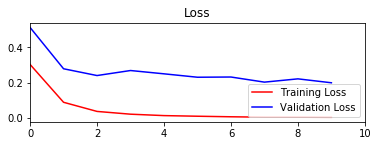

In [10]:
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(train_loss_history, 'r', label='Training Loss')
loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=4)

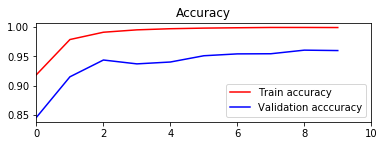

In [11]:
accuracy_plot = plt.subplot(2,1,1)
accuracy_plot.set_title('Accuracy')
accuracy_plot.plot(train_accuracy_history, 'r', label='Train accuracy')
accuracy_plot.plot(validation_accuracy_history, 'b', label='Validation acccuracy')
accuracy_plot.set_xlim([0, EPOCHS])
accuracy_plot.legend(loc=4)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")